**Data Analisis**

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))
from src.utils import data_diagnose
import pandas as pd
from sklearn.preprocessing import RobustScaler
from src.preprocessing import add_technical_indicators

In [3]:
data_path='../data/raw/all_tickers.csv'
df=pd.read_csv(data_path, parse_dates=["Date"])

In [5]:
df.drop(columns='Unnamed: 0',inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735 entries, 0 to 2734
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2735 non-null   datetime64[ns]
 1   Close   2735 non-null   float64       
 2   High    2735 non-null   float64       
 3   Low     2735 non-null   float64       
 4   Open    2735 non-null   float64       
 5   Volume  2735 non-null   int64         
 6   Ticker  2735 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 149.7+ KB


In [7]:
df.head(10)

,Date,Close,High,Low,Open,Volume,Ticker
0,2023-04-17,163.580353,163.738759,162.392337,163.441751,41516200,AAPL
1,2023-04-18,164.807968,165.738586,163.996148,164.441667,49923000,AAPL
2,2023-04-19,165.956390,166.481098,163.887245,164.144659,47720200,AAPL
3,2023-04-20,164.986176,166.193996,163.907062,164.431769,52456400,AAPL
4,2023-04-21,163.372421,164.788137,162.847714,163.402121,58337300,AAPL
5,2023-04-24,163.679352,163.946660,162.253726,163.352645,41949600,AAPL
6,2023-04-25,162.134918,164.649552,162.095309,163.540739,48714100,AAPL
7,2023-04-26,162.125000,163.629828,161.174593,161.431992,45498800,AAPL
8,2023-04-27,166.728592,166.877088,163.540739,163.540739,64902300,AAPL
9,2023-04-28,167.985901,168.154217,166.203884,166.807795,55209200,AAPL


In [8]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,2735,2735.000000,2735.000000,2735.000000,2735.000000,2.735000e+03
mean,2024-04-13 17:35:07.349177344,15480.321957,15759.302567,15160.781235,15460.672886,8.243502e+09
min,2023-04-15 00:00:00,127.676453,129.171215,125.496135,127.838282,3.496900e+06
25%,2023-10-13 00:00:00,193.600037,195.268687,191.853094,193.385795,4.151540e+07
50%,2024-04-15 00:00:00,263.549988,268.048954,259.890015,263.660004,7.451530e+07
75%,2024-10-12 12:00:00,26567.957031,26902.776367,26243.682617,26565.992188,1.017775e+10
max,2025-04-15 00:00:00,106146.265625,109114.882812,105291.734375,106147.296875,1.492189e+11
std,NaN,28093.280400,28627.867373,27483.936202,28064.325509,1.750953e+10


In [9]:
df_sort = df.sort_values(by='Date').copy()

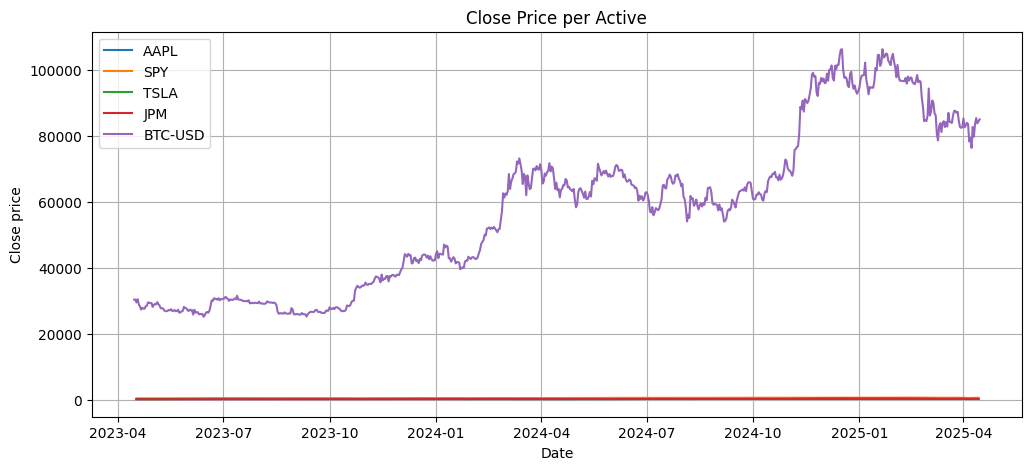

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Close'], label=ticker)
plt.title('Close Price per Active')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend()
plt.grid(True)
plt.show()


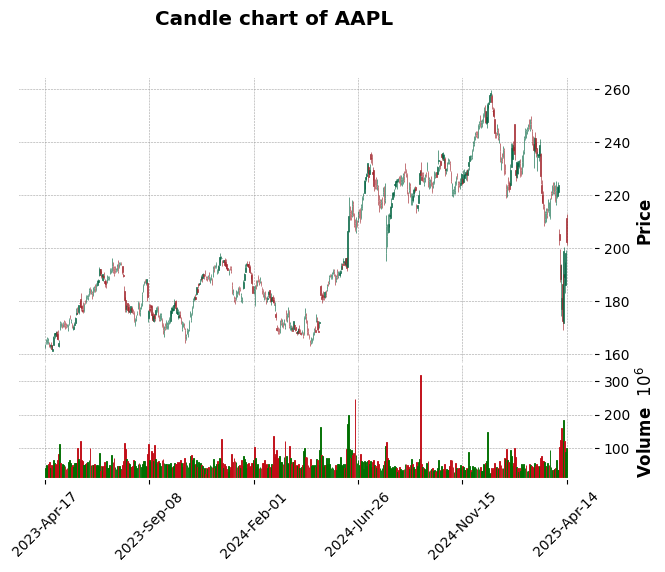

In [11]:
import mplfinance as mpf

ticker = 'AAPL'  
df_candle = df[df['Ticker'] == ticker].copy()
df_candle['Date'] = pd.to_datetime(df_candle['Date'])  # Convert 'Date' column to datetime
df_candle.set_index('Date', inplace=True)
df_candle = df_candle[['Open', 'High', 'Low', 'Close', 'Volume']]

mpf.plot(df_candle, type='candle', volume=True, style='charles', title=f"Candle chart of {ticker}")


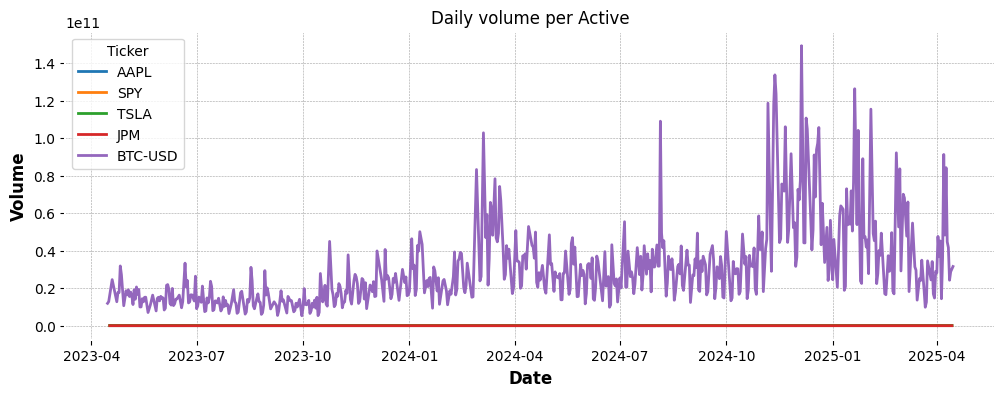

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x='Date', y='Volume', hue='Ticker')
plt.title('Daily volume per Active')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


In [13]:
df = add_technical_indicators(df)


In [14]:
df.head(10)

,Date,Close,High,Low,Open,Volume,Ticker,rsi,bb_mavg,bb_h,bb_l,log_return
19,2023-05-12,171.083374,172.560528,169.526892,172.124317,45497800,AAPL,63.094643,166.930486,173.643618,160.217353,-0.005432
20,2023-05-15,170.587677,171.717856,169.992840,171.668283,37266700,AAPL,61.118037,167.280852,173.989463,160.572241,-0.002902
21,2023-05-16,170.587677,171.648451,170.319999,170.508364,42110300,AAPL,61.118037,167.569837,174.325235,160.814440,0.000000
22,2023-05-17,171.202316,171.440239,168.951868,170.230763,57951600,AAPL,62.794183,167.832133,174.722601,160.941666,0.003597
23,2023-05-18,173.542007,173.730373,171.093284,171.509664,65496700,AAPL,68.381769,168.259925,175.446520,161.073330,0.013574
24,2023-05-19,173.651047,174.870446,173.432941,174.870446,55772400,AAPL,68.618306,168.773856,175.958977,161.588736,0.000628
25,2023-05-22,172.699341,173.204957,171.955802,172.481235,43570900,AAPL,64.110212,169.224856,176.203641,162.246071,-0.005496
26,2023-05-23,170.082062,171.886390,169.804475,171.638544,50747300,AAPL,53.667842,169.622213,175.800027,163.444399,-0.015271
27,2023-05-24,170.359650,170.934655,169.051029,169.616111,45143500,AAPL,54.514064,170.033945,175.167600,164.900290,0.001631
28,2023-05-25,171.499771,172.401920,170.210967,170.924766,56058300,AAPL,57.914028,170.272504,175.209247,165.335762,0.006670


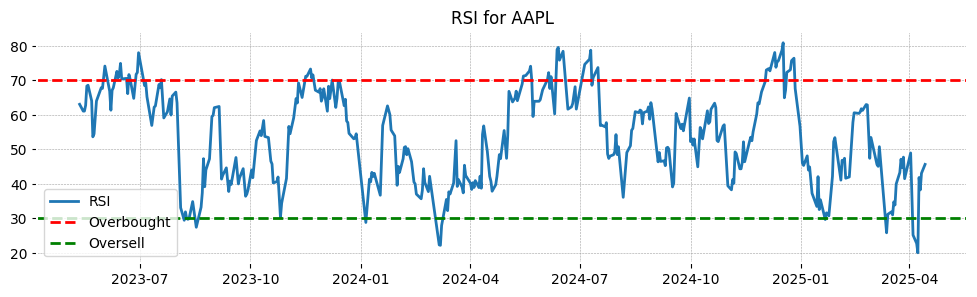

In [15]:
import matplotlib.pyplot as plt

ticker = 'AAPL'
df_plot = df[df['Ticker'] == ticker]

plt.figure(figsize=(12, 3))
plt.plot(df_plot['Date'], df_plot['rsi'], label='RSI')
plt.axhline(70, color='r', linestyle='--', label='Overbought')
plt.axhline(30, color='g', linestyle='--', label='Oversell')
plt.title(f'RSI for {ticker}')
plt.legend()
plt.grid(True)
plt.show()


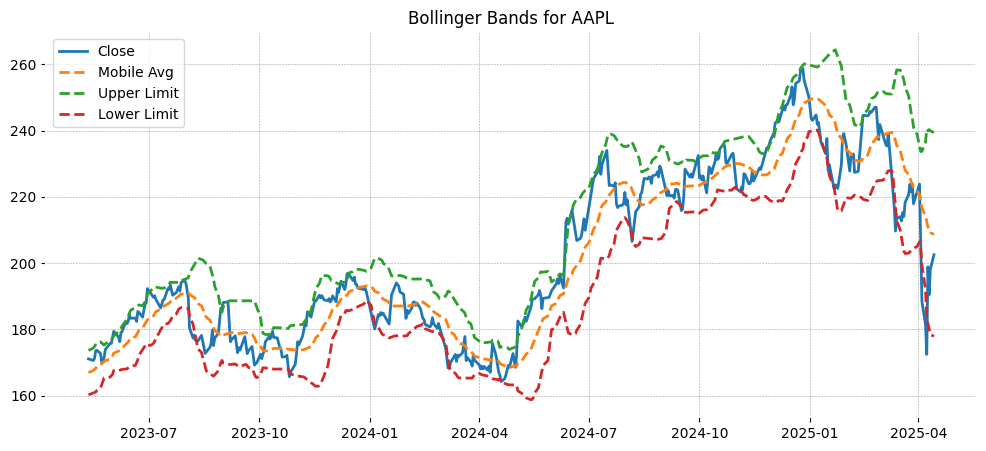

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(df_plot['Date'], df_plot['Close'], label='Close')
plt.plot(df_plot['Date'], df_plot['bb_mavg'], label='Mobile Avg', linestyle='--')
plt.plot(df_plot['Date'], df_plot['bb_h'], label='Upper Limit', linestyle='--')
plt.plot(df_plot['Date'], df_plot['bb_l'], label='Lower Limit', linestyle='--')
plt.title(f'Bollinger Bands for {ticker}')
plt.legend()
plt.grid(True)
plt.show()


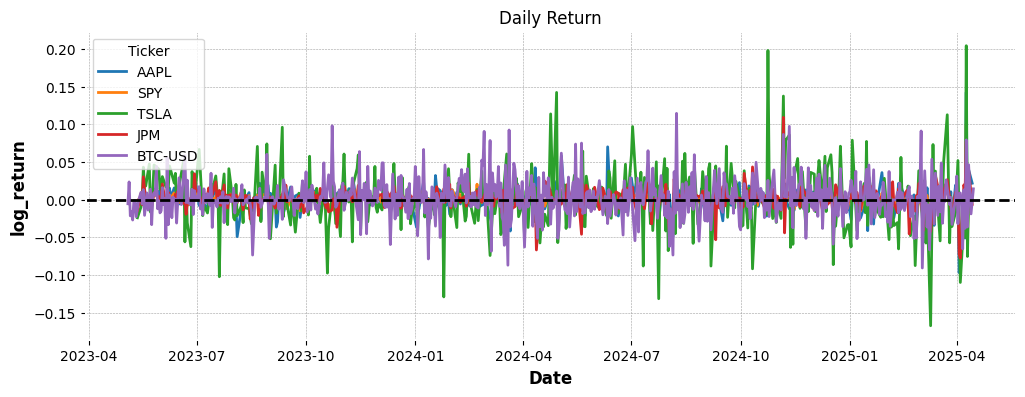

In [17]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x='Date', y='log_return', hue='Ticker')
plt.title('Daily Return')
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.show()